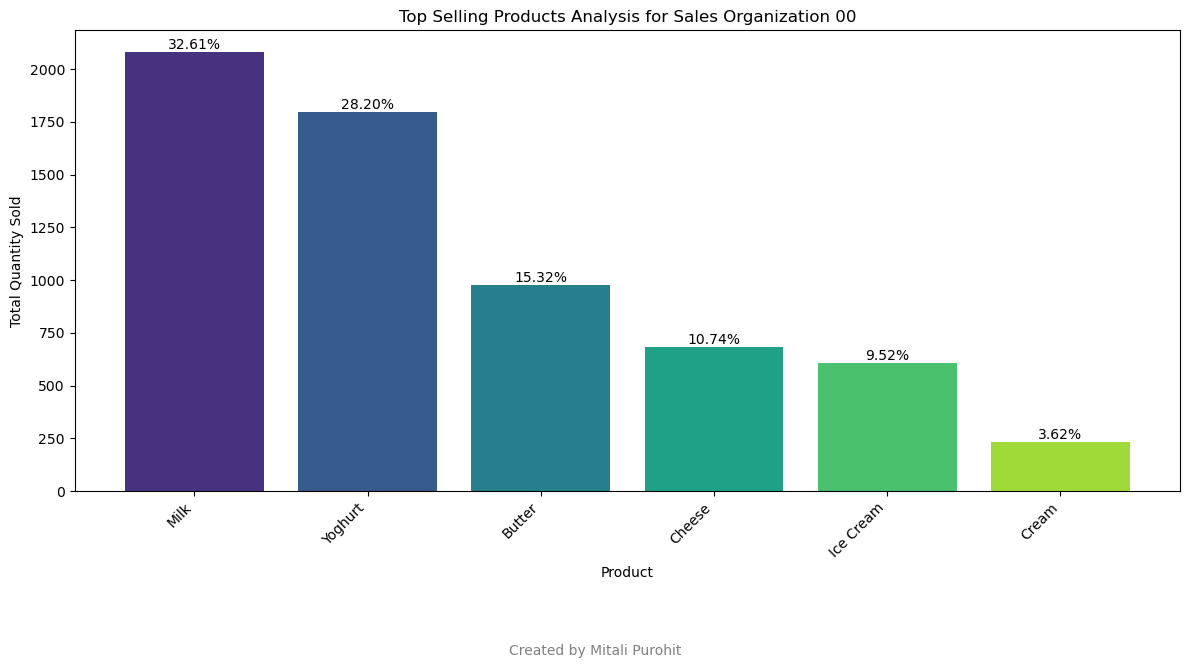

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = "https://github.com/MitaliP001/game/raw/main/sfinal_csv.csv"
df = pd.read_csv(file_path)

# Filter the data for SALES_ORGANIZATION '00'
filtered_df_00 = df[df['SALES_ORGANIZATION'] == 'OO']

# Group by MATERIAL_DESCRIPTION and sum the quantities
top_products_df = filtered_df_00.groupby('MATERIAL_DESCRIPTION')['QUANTITY'].sum().reset_index()

# Sort by quantity in descending order to get top-selling products
top_products_df = top_products_df.sort_values(by='QUANTITY', ascending=False)

# Calculate percentage
top_products_df['PERCENTAGE'] = (top_products_df['QUANTITY'] / top_products_df['QUANTITY'].sum()) * 100

# Define a color palette for the bar chart
colors = sns.color_palette("viridis", len(top_products_df))

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_products_df['MATERIAL_DESCRIPTION'], top_products_df['QUANTITY'], color=colors)
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top Selling Products Analysis for Sales Organization 00')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add percentages to the bars
for bar, percentage in zip(bars, top_products_df['PERCENTAGE']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

# Add "Created by Mitali Purohit" text
plt.text(0.5, -0.1, 'Created by Mitali Purohit', transform=plt.gcf().transFigure, ha='center', color='gray')

plt.show()
